### Para reconhecer a função a ser otimizada

In [1]:
from sympy import symbols, simplify

def recognize_polynomial(expression):
    x = symbols('x')
    try:
        # Tenta simplificar a expressão fornecida
        simplified_expression = simplify(expression)
        print(simplified_expression)
        # Verifica se a expressão simplificada é um polinômio em relação a 'x'
        if simplified_expression.is_polynomial(x):
            return simplified_expression
        else:
            return None
    except:
        return None

while True:
    user_input = input("Digite uma expressão polinomial (ou 'sair' para encerrar): ")
    
    if user_input.lower() == 'sair':
        break
    
    polynomial = recognize_polynomial(user_input)
    if polynomial is not None:
        print("Expressão reconhecida como um polinômio:", polynomial)
    else:
        print("A expressão não é um polinômio válido.")


2*x**2 + 9
Expressão reconhecida como um polinômio: 2*x**2 + 9
2*cos(x) - 9
A expressão não é um polinômio válido.


### Exemplo em python
https://www.youtube.com/watch?v=JqTASBiMVT8

Best fitness value =  1.381840703219637e-57


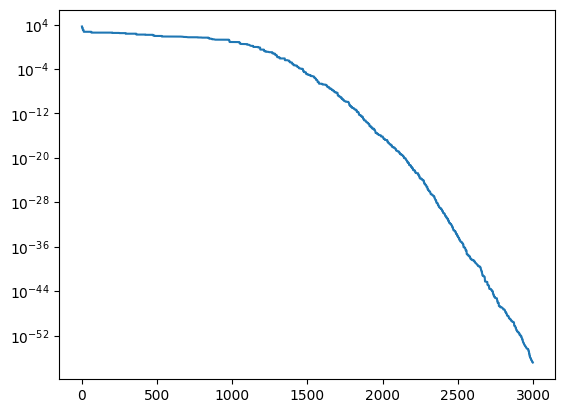

In [3]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Função esfera
def Esfera(x):
    z = np.sum(np.square(x))
    return z

#Configurando Parametros
d = 10 
xMin, xMax = -100, 100 #limite do espaço de busca
vMin, vMax = -0.2*(xMax - xMin), 0.2*(xMax - xMin) #limites de velocidade
MaxIt = 3000
ps = 10
c1 = 2
c2 = 2
w = 0.9 - ((0.9 - 0.4)/MaxIt) * np.linspace(0,MaxIt, MaxIt)

def limitV(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i] = vMax
        if V[i] < vMin:
            V[i] = vMin
    return V

def limitX(X):
    for i in range(len(X)):
        if X[i] > vMax:
            X[i] = vMax
        if X[i] < vMin:
            X[i] = vMin
    return X

#Algoritmo PSO
def Otimizacao():
    class Particula():
        def __init__(self):
            self.posicao = np.random.uniform(xMin, 50, [ps, d])
            self.velocidade = np.random.uniform(vMin, vMax, [ps, d])
            self.custo = np.zeros(ps)
            self.custo[:] = Esfera(self.posicao[:])
            self.pbest = np.copy(self.posicao)
            self.pbest_custo = np.copy(self.custo)
            self.index = np.argmin(self.pbest_custo)
            self.gbest = self.pbest[self.index]
            self.gbest_custo = self.pbest_custo[self.index]
            self.BestCusto = np.zeros(MaxIt)
        
        def Avaliar(self):
            for it in range(MaxIt):
                for i in range(ps):
                    self.velocidade[i] = (w[it]*self.velocidade[i] 
                                          + c1*np.random.rand(d)*(self.pbest[i] - self.posicao[i]) 
                                          + c2*np.random.rand(d)*(self.gbest - self.posicao[i]))
                    self.velocidade[i] = limitV(self.velocidade[i])
                    self.posicao[i] = self.posicao[i] + self.velocidade[i]
                    self.posicao[i] = limitX(self.posicao[i])
                    self.custo[i] = Esfera(self.posicao[i])
                    if self.custo[i] < self.pbest_custo[i]:
                        self.pbest[i] = self.posicao[i]
                        self.pbest_custo[i] = self.custo[i]
                        if self.pbest_custo[i] < self.gbest_custo:
                            self.gbest = self.pbest[i]
                            self.gbest_custo = self.pbest_custo[i]
                            
                self.BestCusto[it] = self.gbest_custo
                
        def Plot(self):
            plt.semilogy(self.BestCusto)
            print('Best fitness value = ',self.gbest_custo)
    a = Particula()
    a.Avaliar()
    a.Plot()
Otimizacao()
